In [102]:
#! pip install textblob 

In [101]:
#!pip install tweepy

In [103]:
#!pip install -U spacy
#!python -m spacy download en

In [4]:
#Import requests to extract content from a url
import requests
#Beautifulsoupis for web screapping used t scrap specific content
from bs4 import BeautifulSoup as bs
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import nltk
import tweepy

In [104]:
Elon_musk=pd.read_csv("D:/Data Secience/Assignment/Text Mining/Elon_musk.csv", encoding= "ISO-8859-1")

In [105]:
Elon_musk

,No,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [134]:
 # Tweeter API Credentials # We want pull data from direct tweeter account then we have to follow below steps 
consumer_key ="Key"
consumer_secret="Key"
access_key     ="Key"                
access_secret="Key"

In [135]:
 # Create the authentication objective  # We want pull data from direct tweeter account then we have to follow below steps 
    
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

# Set the access key adn access secret
auth.set_access_token(access_key, access_secret)

# Create the API object wile passing in the auth information 
api = tweepy.API(auth, wait_on_rate_limit =True)

In [138]:
 #new_tweets = api.user_timeline(screen_name = 'elon musk',count=200)
#alltweets.extend(new_tweets)

In [106]:
em_df=Elon_musk.drop('No', axis=1)

In [107]:
em_df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


 ## Cleaning the data

In [113]:
# Create a function to clean the tweets
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @
    text=re.sub(r'#', '',text) #Remove #
    text=re.sub(r'RT[\s]+', '', text) # Remove RT
    text=re.sub(r'https?:\/\/\S+', '', text) # Remove hyper link
    text=re.sub("[0-9" "]+"," ",text)
    text=re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters/emojis
    return text

In [114]:
#Clean Text
em_df['Text']=em_df['Text'].apply(cleanText)

In [139]:
em_df.head()

,Text
0,Im an alien
1,AACarmack Ray tracing on Cyberpunk with HDR is...
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [141]:
 # Create a funcation to get the polarity
def getPloarity(text):
    return TextBlob(text).sentiment.polarity


In [203]:
#Create new column
em_df['Polarity Score']=em_df['Text'].apply(getPloarity)

In [197]:
em_df

,Text,Polarity,Analysis
0,Im an alien,-0.250000,Negative
1,AACarmack Ray tracing on Cyberpunk with HDR is...,0.000000,Neutral
2,Great interview,0.800000,Positiv
3,Doge is underestimated,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.275000,Positiv
...,...,...,...
1994,True it sounds so surreal but the negative pr...,0.111111,Positiv
1995,Make sure to read ur terms amp conditions bef...,0.500000,Positiv
1996,Samwise Gamgee,0.000000,Neutral
1997,Altho Dumb and Dumber is U F U F,-0.375000,Negative


## Rule Based Approach

In [239]:
# Removing unwanted symbols incase if exists
em_df_rev_string = re.sub("[0-9" "]+"," ",em_df_rev_string) 

# Joinining all the reviews into single paragraph 
em_df_rev_string = " ".join(allwords)

stop_words = stopwords.words('english')

In [240]:
em_df_rev_string

'  I m   a n   a l i e n   A A C a r m a c k   R a y   t r a c i n g   o n   C y b e r p u n k   w i t h   H D R   i s   n e x t l e v e l   H a v e   y o u   t r i e d   i t       G r e a t   i n t e r v i e w     D o g e   i s   u n d e r e s t i m a t e d     C o n g r a t u l a t i o n s   T e s l a   C h i n a   f o r   a m a z i n g   e x e c u t i o n   l a s t   y e a r   N o w   o n   t o   t h e   n e x t   f o r   e v e n   m o r e   H a p p y   N e w   Y e a r   o f   t h e   O x     F r o d o   w a s   t h e   u n d e r d o g e \n A l l   t h o u g h t   h e   w o u l d   f a i l \n H i m s e l f   m o s t   o f   a l l           H a h a   t h a n k s         I n d e e d   T w e e t s   d e f i n i t e l y   d o   n o t   r e p r e s e n t   r e a l w o r l d   t i m e   a l l o c a t i o n   T h e   m o s t   e n t e r t a i n i n g   o u t c o m e   i s   t h e   m o s t   l i k e l y     J u s t   s e n t   s o m e   J u s t   a g r e e   t o   d o   C l u b h o u s e  

 ## World Cloud

<function matplotlib.pyplot.show(close=None, block=None)>

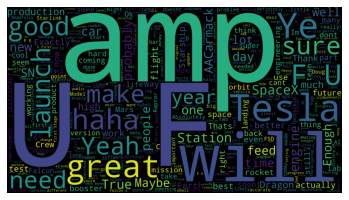

In [261]:
allwords=' '.join([twts for twts in em_df['Text']])

wordcloud_em= WordCloud(
                        background_color='black',
                         max_words= 500, width =1800, height=1000
                         ).generate(allwords)
plt.imshow(wordcloud_em)
plt.axis("off")
plt.show

In [199]:
# Create a Function to compute the negative , nautral and positive analysis

def get_sentiment(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
   
    
em_df['Analysis'] = em_df['Polarity'].apply(get_sentiment)


In [195]:
em_df=em_df.drop('Polarity Score',axis=1)
em_df=em_df.drop('scores',axis=1)
em_df=em_df.drop('compound',axis=1)
em_df=em_df.drop('comp_score',axis=1)

In [200]:
em_df

,Text,Polarity,Analysis
0,Im an alien,-0.250000,Negative
1,AACarmack Ray tracing on Cyberpunk with HDR is...,0.000000,Neutral
2,Great interview,0.800000,Positive
3,Doge is underestimated,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.275000,Positive
...,...,...,...
1994,True it sounds so surreal but the negative pr...,0.111111,Positive
1995,Make sure to read ur terms amp conditions bef...,0.500000,Positive
1996,Samwise Gamgee,0.000000,Neutral
1997,Altho Dumb and Dumber is U F U F,-0.375000,Negative


In [208]:
 # Print all of the positive Text
j=1
sortedDF =em_df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
    
        print(str(j)+ ')' +sortedDF['Text'][i])
        print()
        j= j+1


1)  Great interview

2) Congratulations Tesla China for amazing execution last year Now on to the next for even more

3)Happy New Year of the Ox 

4)   Haha thanks 

5)The most entertaining outcome is the most likely

6)  Its getting real

7) He definitely has issues but the sentencing seems a bit high

8) Thanks for fixing

9)This is true power haha 

10) NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission 

11)   Once we can predict cash flow reasonably well Starlink will IPO

12)  Does seem a bit high

13)  Wow

14)    So cute U F 

15) Extremely misleading image as doesnt reflect true time cost to people or rain amp pain

16) Its the most fun crypto

17) True

18)  Not that easy This is two decades of intense work Have to look at old notes emails texts

19) Have you read  Its great

20) Sure

21)The great thing about restaurants is that you get to hang out with strangers  SJM

22)Much wow

23) bickett   That said the ship la

In [210]:
 # Print all of the Negative Text
j=1
sortedDF =em_df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
    
        print(str(j)+ ')' +sortedDF['Text'][i])
        print()
        j= j+1

1) Im an alien

2) Your app sucks

3)  Starlink is a staggeringly difficult technical amp economic endeavor However if we don 

4)  SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 

5) Everyone at Tesla receives stock 

My comp is all stockoptions which I do not take off the table 

Thats what youre missing

6) Doge appears to be inflationary but is not meaningfully so fixed  of coins per unit time whereas 

7)  It was foolish of us not to start   engines amp immediately shut down   as   are needed to land

8) We were too dumb

9)This was a tough one 

10) This mission enables access for everyday people who dream of going to space

11)feed Earth is small amp we are smaller still 

12) Ryan A little

13) TeslaNews  Yeah probably in a few months

14) After you drive without using a PRND stalkstick for a few days it gets very annoying to go back amp use a shifter

15) No more stalks Car guesses drive direction based on what obstacles it sees contex

In [246]:
 # Print all of the positive Text
j=1
sortedDF =em_df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Neutral'):
    
        print(str(j)+ ')' +sortedDF['Text'][i])
        print()
        j= j+1

1)AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it

2) Doge is underestimated

3)Frodo was the underdoge
All thought he would fail
Himself most of all 

4)  Indeed Tweets definitely do not represent realworld time allocation

5) Just sent some

6)Just agree to do Clubhouse with 

7)

8)Bought some Dogecoin for lil X so he can be a toddler hodler

9) Please unlock my account

10) U F U F 

11) Any crypto wallet that wont give you your private keys should be avoided at all costs

12) Yes

13)AACarmack Lowest cost per ton of carbon sequestered net of value of any product made 

Must be scalable to g 

14) Its meant to be the same price in all countries Only difference should be taxes amp shipping

15) This is intended for Earth but there may be some ideas that apply to Mars too

16)   ZPalmer U F U F 

17)XPrize team will manage the  M carbon capture prize 

18)Back to work I go 

19)    Orbital launch tower that can stack
  Enough Raptors for orbit booster
  I

In [242]:
ptexts=em_df[em_df.Analysis == 'Positive']
ptexts=ptexts['Text']

round( (ptexts.shape[0] / em_df.shape[0]) * 100, 1)

44.1

In [243]:
ptexts=em_df[em_df.Analysis == 'Negative']
ptexts=ptexts['Text']

round( (ptexts.shape[0] / em_df.shape[0]) * 100, 1)

11.4

In [247]:
ptexts=em_df[em_df.Analysis == 'Neutral']
ptexts=ptexts['Text']

round( (ptexts.shape[0] / em_df.shape[0]) * 100, 1)

44.5

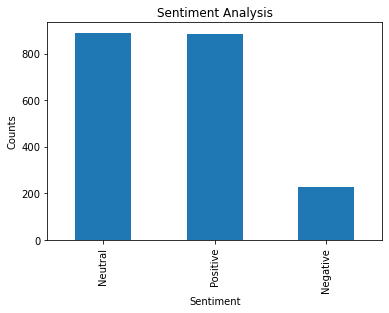

In [245]:
# Show the value counts

em_df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
em_df['Analysis'].value_counts().plot(kind='bar')
plt.show()

 ## Interpretation

   ### As per above analysis we can see 44.5% having Neutral Tweets.